# Curriculum Data

In [1]:
import pandas as pd
import numpy as np

filename = 'me.csv'

df = pd.read_csv(filename)

### Stage 1. Pandas DataFrame

In [2]:
print(df)

                              explicit pre-requisites          course name
0                                                 NaN            CHEM 1310
1                                                 NaN            MATH 1551
2                                                 NaN            MATH 1553
3                                                 NaN          Legislative
4                                                 NaN            ENGL 1101
5                                                 NaN             Wellness
6                               MATH 1551, MATH 1552*            PHYS 2211
7                                           MATH 1551            MATH 1552
8                                                 NaN              CS 1371
9                                                 NaN              ME 1670
10                                          ENGL 1101            ENGL 1102
11                                          PHYS 2211            PHYS 2212
12                       

In [3]:
df.shape

(45, 2)

### Stage 2. Dictionary
Note: Pandas may actually be better. But I don't know how to use it properly.

In [4]:
# example: regex-based string -> list conversion
import re

text = 'MATH 1552, MATH 1553, MATH 2552*, CS 1371'
chunks = re.split('\, ', text)
print(chunks)

['MATH 1552', 'MATH 1553', 'MATH 2552*', 'CS 1371']


Use `pd.isna(desired)` to check for NaN. (Why isn't this more trivial?)

In [5]:
curriculum = {}

In [6]:
# immediate explicit pre-requisites
for i in range(df.shape[0]):
    if pd.isna(df.iloc[i,0]): # NaN
        curriculum[df.iloc[i,1]] = []
    else: # pre-reqs exist. put them into list
        curriculum[df.iloc[i,1]] = re.split('\, ', df.iloc[i,0]) 

In [7]:
curriculum

{'CHEM 1310': [],
 'MATH 1551': [],
 'MATH 1553': [],
 'Legislative': [],
 'ENGL 1101': [],
 'Wellness': [],
 'PHYS 2211': ['MATH 1551', 'MATH 1552*'],
 'MATH 1552': ['MATH 1551'],
 'CS 1371': [],
 'ME 1670': [],
 'ENGL 1102': ['ENGL 1101'],
 'PHYS 2212': ['PHYS 2211'],
 'MATH 2551': ['MATH 1552', 'MATH 1553'],
 'ME 2110': ['ME 1670', 'COE 2001'],
 'MSE 2001': ['CHEM 1310'],
 'COE 2001': ['MATH 1552', 'PHYS 2211'],
 'ECE 3710': ['PHYS 2212'],
 'MATH 2552': ['MATH 1552', 'MATH 1553'],
 'ME 2016': ['MATH 1552', 'MATH 1553', 'MATH 2552*', 'CS 1371'],
 'ME 2202': ['COE 2001', 'MATH 1553*'],
 'Social Science': [],
 'ECE 3741': ['ECE 3710'],
 'COE 3001': ['COE 2001', 'MATH 2552*'],
 'ME 3322': ['PHYS 2211', 'MATH 2552'],
 'ME 3340': ['ME 2202', 'MATH 2551', 'MATH 2552', 'ME 3322*'],
 'ECON 2001': [],
 'Humanities': [],
 'ME 3017': ['ME 2202', 'ME 2016', 'MATH 2552', 'ECE 3710'],
 'ME 3345': ['ME 3322', 'ME 3340', 'MATH 2552'],
 'ME 3057': ['COE 3001', 'ME 3340', 'ME 3017*', 'ME 3345*', 'MATH

## Stage 3. Class

-> Spectacular failure

In [8]:
class Cour:
    def __init__(self, name, prereqs=[], default_year=None, buildsto=[]):
        self.name = name
        self.prereqs = prereqs
        self.year = default_year if default_year else self.infer_year()
        self.buildsto = buildsto # needs to be supplied/set by curr class

    def infer_year(self):
        searched = re.search("\ [0-9]", self.name)
        if searched: 
            return int(searched.group()[1]) # the second char of search result

[Issue #19: Iterate through nodes and edges?](https://github.com/xflr6/graphviz/issues/19)  
Basically we are to implement advanced functionality inside our own data types and use graphviz only as a lightweight *creation* tool.  
Therefore, let's make curriculum_list into a class, with attributes contained within itself.
스케치 하고 짜면 빠르게 할듯~~

In [9]:
ME_1670 = Cour('ME 1670')

In [10]:
ME_2110 = Cour('ME 2110', ['ME 1670'])

In [11]:
ME_3210 = Cour('ME 3210', ['ME 2110'])

In [12]:
class Curr:
    def __init__(self, cours): 
        self.cours = cours

    def fill_buildsto(self):
        for cour in self.cours:
            for cour_ in self.cours:
                if not cour_.prereqs: return
                for prereq in cour_.prereqs: # prereq is a string
                    if prereq == cour.name:
                        cour.buildsto.append(prereq)

    def grad_sem_propagation(self): pass
        

In [13]:
ME = Curr([ME_1670, ME_2110, ME_3210])
ME.fill_buildsto()

In [14]:
print(ME.cours[0].buildsto)

[]


## Stage 3.1: Class ain't it

> Let's just represent stuff in dict, write **external** functions (there are 40-some courses; why make a class for each when in fact, this is an array — same behavior for lots of instances?)  Then pass immediate, secondary, capstone onto frontend. Also definitely can have them computed in client-side.

Reasons
1. Dict is 1-to-1 compatible with json — the de-facto data transmission format for the web.
2. Unsure if object-oriented approach is best for this problem.
- Most likely there's an abundance of knowledge precisely around these problems (network; dependency; graph). 
- Right now I don't know anything; I'm just brute-forcing my way through. This is pretty stupid. Let's do some fucking research

## Stage 4. Treeshake

### Necessary?
**→ YES** (see MATH 2552 and ME 3340). Also a good practice!  

### Pseudocode
- for each pre-req in course:
  - check and see if other pre-reqs already require it
  - maxdepth 1 seems fine. actually don't know how I would implement recursion.
- if empty, return

> This pseudocode is **shit**. wasted me two hours. 

### New Pseudocode
- each course has a set of explicit (or immediate) pre-reqs. don't do anything with this yet
- each explicit pre-req has another set of explicit pre-reqs (we call this implicit pre-req)
- iterate through all explicit (and through all implicit) to add every occurring implicit to a set 
- now see if any explicit creates a redundancy by repeating any implicit.
  - if so, delete that explicit

Some Notes
- Note that pre-req redundancy may happen where depth differences are >1. 
  - I'm making an assumption that most redundancies happen in depth_diff=1, because it's expensive to compute further. 
    - Counterargument: Even though Python for loop is slow, size is king. These arrays are 50-long as most; compute time may be trivial.
      - nested three times though. 50^3 = 125,000
- set ~= hashable list; hashable ←→ faster, unique vals.

In [33]:
verbose = False # DEBUG

def treeshake(curriculum):
    curr = curriculum.copy()
    
    # iterate over each course in curriculum
    for course, pre_reqs in curriculum.items():
        if verbose: print('new case:', course) # DEBUG
        
        # introductory course
        if not pre_reqs: continue

        # set of implicit prerequisites
        seen = set()

        # fetch implicit prerequisite (depth 1)
        for (idx, explicit) in enumerate(pre_reqs):
            # handle co-req 
            exp = explicit[:-1] if explicit[-1] == '*' else explicit

            # introductory explicit
            if not curr[exp]: continue 
            # important to keep this line. removing this breaks the whole thing

            # 
            for (jdx, implicit) in enumerate(curr[exp]):
                if idx == jdx: continue # unsure if necessary / helpful. TEST BOTH WAYS.
                # if candidate not in seen:  # Note: doesn't seem necessary because set is unique anyway.
                seen.add(implicit)
                    # curriculum[course].pop(idx)
        
        if verbose: print('implicit:', seen)
        # if an implicit prerequisite is made explicit (redundancy), remove the explicit.
        for (idx, target) in enumerate(pre_reqs):
            if target in seen: 
                curr[course].pop(idx)
                if verbose: print('DELETED:', target)

    return curr

In [16]:
curr = treeshake(curriculum)

In [17]:
# def find_occurrence(target, area):
#     for body in area:
#         if target == area: 

In [18]:
curr

{'CHEM 1310': [],
 'MATH 1551': [],
 'MATH 1553': [],
 'Legislative': [],
 'ENGL 1101': [],
 'Wellness': [],
 'PHYS 2211': ['MATH 1552*'],
 'MATH 1552': ['MATH 1551'],
 'CS 1371': [],
 'ME 1670': [],
 'ENGL 1102': ['ENGL 1101'],
 'PHYS 2212': ['PHYS 2211'],
 'MATH 2551': ['MATH 1552', 'MATH 1553'],
 'ME 2110': ['ME 1670', 'COE 2001'],
 'MSE 2001': ['CHEM 1310'],
 'COE 2001': ['MATH 1552', 'PHYS 2211'],
 'ECE 3710': ['PHYS 2212'],
 'MATH 2552': ['MATH 1552', 'MATH 1553'],
 'ME 2016': ['MATH 1553', 'MATH 2552*', 'CS 1371'],
 'ME 2202': ['COE 2001', 'MATH 1553*'],
 'Social Science': [],
 'ECE 3741': ['ECE 3710'],
 'COE 3001': ['COE 2001', 'MATH 2552*'],
 'ME 3322': ['PHYS 2211', 'MATH 2552'],
 'ME 3340': ['ME 2202', 'MATH 2551', 'ME 3322*'],
 'ECON 2001': [],
 'Humanities': [],
 'ME 3017': ['ME 2202', 'ME 2016', 'MATH 2552', 'ECE 3710'],
 'ME 3345': ['ME 3322', 'ME 3340'],
 'ME 3057': ['COE 3001', 'ME 3017*', 'ME 3345*', 'MATH 3670*'],
 'ISYE 3025': ['ECON 2001'],
 'MATH 3670': ['MATH 255

In [19]:
# pseudocode to calculate "grad_sem"

# capstone courses have 1 grad_sem.
# having a normal edge directed to capstone adds 1 grad_sem.
# co-req doesn't add an edge.
# since there are many capstones (and may occur in some 2nd/3rd year courses),
# if conflicted, choose the larger of the two.

# Flowchart Visualization

## Graphviz Basics

In [20]:
import graphviz

### Basic Example

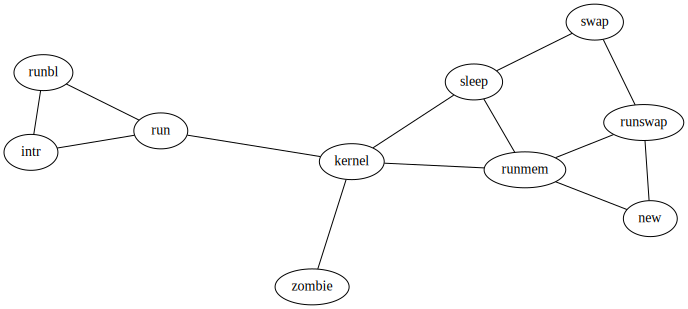

In [21]:
# introduction
"""https://graphviz.org/Gallery/undirected/process.html"""

g = graphviz.Graph('G', filename='process.gv', engine='sfdp')

g.edge('run', 'intr')
g.edge('intr', 'runbl')
g.edge('runbl', 'run')
g.edge('run', 'kernel')
g.edge('kernel', 'zombie')
g.edge('kernel', 'sleep')
g.edge('kernel', 'runmem')
g.edge('sleep', 'swap')
g.edge('swap', 'runswap')
g.edge('runswap', 'new')
g.edge('runswap', 'runmem')
g.edge('new', 'runmem')
g.edge('sleep', 'runmem')

g

### Tree Structure

In [22]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
        

class Solution(object):
    def mergeTrees(self, t1, t2):
        """
        :type t1: TreeNode
        :type t2: TreeNode
        :rtype: TreeNode
        """
        
        if t1 and t2:
            # Merge the values from two trees
            node = TreeNode(t1.val + t2.val)
            
            # Merge the left trees using the function recursively
            node.left = self.mergeTrees(t1.left, t2.left)
            
            # Merge the right trees using the function recursively
            node.right = self.mergeTrees(t1.right, t2.right)
            
            return node
            
        else:
            return t1 or t2

def visualize_tree(tree):
    def add_nodes_edges(tree, dot=None):
        # Create Digraph object
        if dot is None:
            dot = graphviz.Digraph('G', filename='process.gv')
            dot.node(name=str(tree), label=str(tree.val))

        # Add nodes
        if tree.left:
            dot.node(name=str(tree.left) ,label=str(tree.left.val))
            dot.edge(str(tree), str(tree.left))
            dot = add_nodes_edges(tree.left, dot=dot)
            
        if tree.right:
            dot.node(name=str(tree.right) ,label=str(tree.right.val))
            dot.edge(str(tree), str(tree.right))
            dot = add_nodes_edges(tree.right, dot=dot)

        return dot
    
    # Add nodes recursively and create a list of edges
    dot = add_nodes_edges(tree)
    
    return dot

In [23]:
# Example 1

# Left tree
t1 = TreeNode(1)
t1.left = TreeNode(3)
t1.left.left = TreeNode(5)
t1.right = TreeNode(2)

# Right tree
t2 = TreeNode(2)
t2.left = TreeNode(1)
t2.left.right = TreeNode(4)
t2.right = TreeNode(3)
t2.right.right = TreeNode(7)

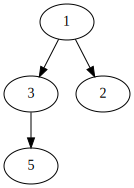

In [24]:
visualize_tree(t1)

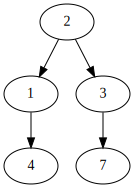

In [25]:
visualize_tree(t2)

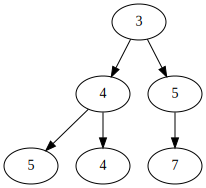

In [26]:
s = Solution()
visualize_tree(s.mergeTrees(t1, t2))

## Preliminary Experiment

In [27]:
import graphviz

### Optimizing Aesthetics

GraphViz has a built-in color scheming system. No need to use palettable.

In [28]:
def get_map(curriculum, kwargs={}):

    # graph
    c = graphviz.Digraph('Curriculum') # format='jpg' # filename='process.gv'
    c.attr(rankdir='LR') # make this horizontal. (important)
    c.attr(**kwargs) # pass keyword arguments to Digraph object
        
    # node defaults
    c.node_attr['colorscheme']='ylgnbu9' # color scheme
    c.node_attr['style'] = 'rounded, filled'
    c.node_attr['shape'] = 'box'

    # iterate upon each course
    for course, pre_reqs in curriculum.items():

        # course has pre-reqs
        if pre_reqs:
            for pre_req in pre_reqs:
                # co-req
                if pre_req[-1] == '*': 
                    # c.node(pre_req[:-1], color='2')
                    c.edge(pre_req[:-1], course, color='green')
                # pre-req
                else: 
                    # c.node(pre_req, color='1')
                    c.edge(pre_req, course)
        else: 
            c.node(course, color='3') # ensures that introductory courses exist
    return c

You can make an entire graph solely out of edge commands? What a legendary API wtf

Bug: humanities not shown. Where did it disappear? → Fixed ✅  
**ㄴ node never gets created in cases where incoming and outcoming pre-reqs do not exist.**  

### Interactivity (Completed Courses)

In [29]:
from ipywidgets import widgets
from IPython.display import display

In [30]:
# Nx4 matrix of checkboxes
checkboxes = []
for course in curriculum.keys():
    checkboxes.append(widgets.Checkbox(description=course))

width = 4; height = len(checkboxes)//width+1 # boundary case ain't perfect but whatevs.

columns = []
for i in range(width): columns.append(widgets.VBox(checkboxes[height*i:height*(i+1)])) # fill in the columns
hbox = widgets.HBox([*columns]) # dot operator unpacks an iterable
display(widgets.VBox([widgets.Label('Check your completed courses.'), hbox]))

**`delete_course()`**

Let's make it non-mutable. Nah let's make it mutable.

Pseudocode:
- if a completed course is within curriculum, find and delete all occurrence of it as a pre-req.
- if it has a pre-req (not a co-req), delete all of its pre-reqs too.

In [31]:
def delete_course(curriculum):
    for course in curriculum.keys(): pass

# print all the deleted courses.

**WAIT: It seems like a good idea to delay implementing this until curriculum object is defined.**

# Output

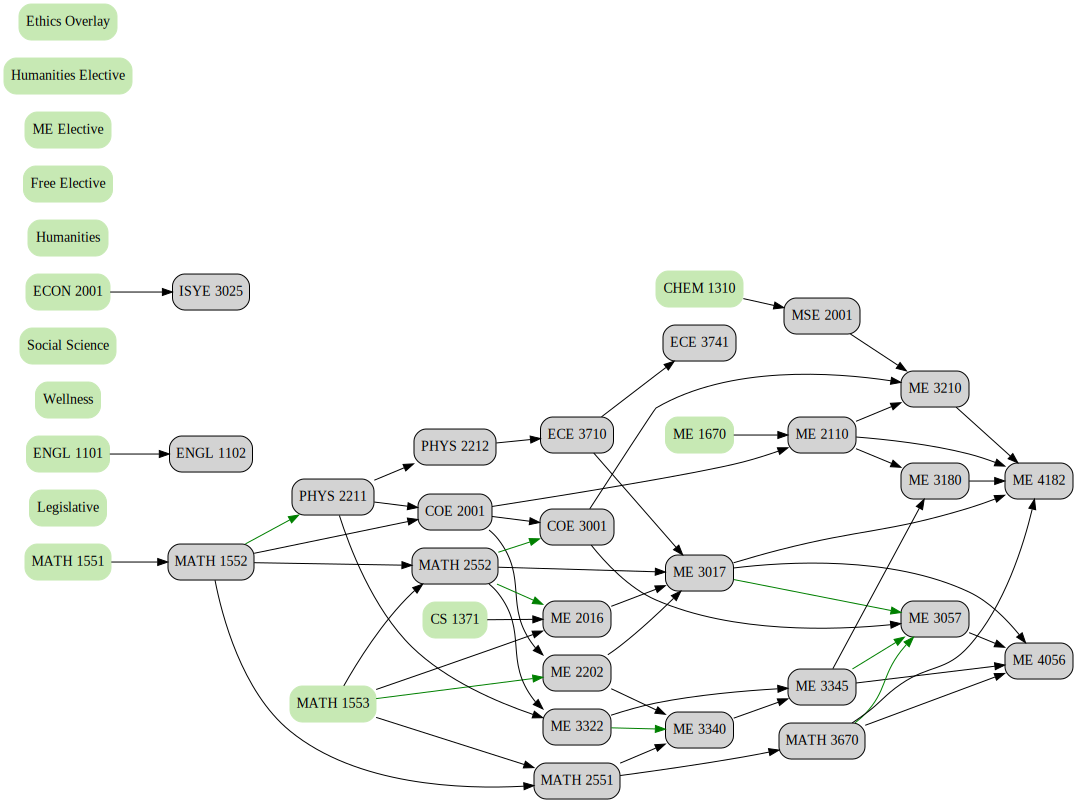

In [34]:
get_map(curr)

Question: will it output the same if the order of curriculum-dict is randomized?  

Idea: Have recommended (default) — softly-enforced — rank (grad_sem) for humanities  

Idea: Double circle = immediately doable. Diamond = capstone.

Color Scheme for the Future
- (neon) green: immediately doable
- (neon) purple: capstone
- (neon) yellow: normal
- (neon) blue: 

# Resources
- [(og) graphviz documentation](https://graphviz.org/doc/info/attrs.html)
- [regex101](https://regex101.com)
- [pandas: indexing](https://pandas.pydata.org/docs/user_guide/indexing.html)